## Combine all the bag revenue csv files into one

In [ ]:
import pandas as pd
import numpy as np
import glob
import os

In [50]:
# Initialize path for all csv files
bag_revenues_path = r'C:\Users\Nav\Documents\BaggageRevenueModel\BaggageRevenueModel\data\bag-rev-2015-2024'
all_files = glob.glob(os.path.join(bag_revenues_path, "*.csv"))

In [51]:
dfs = []

for f in all_files:
   
    year = ''.join([c for c in os.path.basename(f) if c.isdigit()])
    
    df = pd.read_csv(f, thousands=',')
    df.columns = df.columns.str.strip()
    df = df.drop(df.columns[-1], axis=1)
    df = df[df['Airline'].str.lower() != 'all']
    
    # Rename quarter columns to include the year
    rename_map = {
        '1Q': f'{year}-Q1',
        '2Q': f'{year}-Q2',
        '3Q': f'{year}-Q3',
        '4Q': f'{year}-Q4'
    }
    df = df.rename(columns=rename_map)
    
    # Keep only airline + the four quarters
    keep_cols = ['Airline'] + [rename_map[q] for q in ['1Q', '2Q', '3Q', '4Q'] if q in rename_map]
    df = df[keep_cols]
    dfs.append(df)


In [52]:
# Merge all yearly data on Airline
combined_df = dfs[0]
for df in dfs[1:]:
    combined_df = pd.merge(combined_df, df, on='Airline', how='outer')

combined_df = combined_df.sort_values(by='Airline').reset_index(drop=True)
combined_df = combined_df.dropna()

combined_df.head()

,Airline,2015-Q1,2015-Q2,2015-Q3,2015-Q4,2016-Q1,2016-Q2,2016-Q3,2016-Q4,2017-Q1,...,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3,2024-Q4
1,Alaska,23686.0,30215.0,34127.0,24787.0,30484.0,35022.0,39297.0,30811.0,30602.0,...,92981.0,80917.0,74482.0,97943.0,101337.0,84549.0,83934.0,106033.0,118372.0,98236.0
2,Allegiant,40444.0,42463.0,39934.0,38523.0,43759.0,45934.0,45168.0,42468.0,46556.0,...,83634.0,80586.0,88685.0,96696.0,86787.0,85386.0,90754.0,101292.0,90031.0,89385.0
3,American,151758.0,165660.0,292089.0,267293.0,262464.0,288836.0,288124.0,278048.0,272805.0,...,351356.0,348944.0,325296.0,352279.0,342047.0,337299.0,334743.0,394435.0,389782.0,382369.0
5,Delta,198119.0,226294.0,236890.0,213799.0,197690.0,232461.0,228971.0,213297.0,203507.0,...,252159.0,234831.0,226255.0,253222.0,259462.0,246286.0,239012.0,289749.0,259227.0,272113.0
7,Frontier,42011.0,49565.0,56582.0,71886.0,70755.0,71578.0,84962.0,79497.0,80224.0,...,201770.0,222968.0,221438.0,231463.0,211176.0,215842.0,203624.0,233695.0,212662.0,211643.0


In [53]:
# convert the combined df into a csv file
combined_df.to_csv(r'C:\Users\Nav\Documents\BaggageRevenueModel\BaggageRevenueModel\data\combined_bag_revenue.csv', index=False)

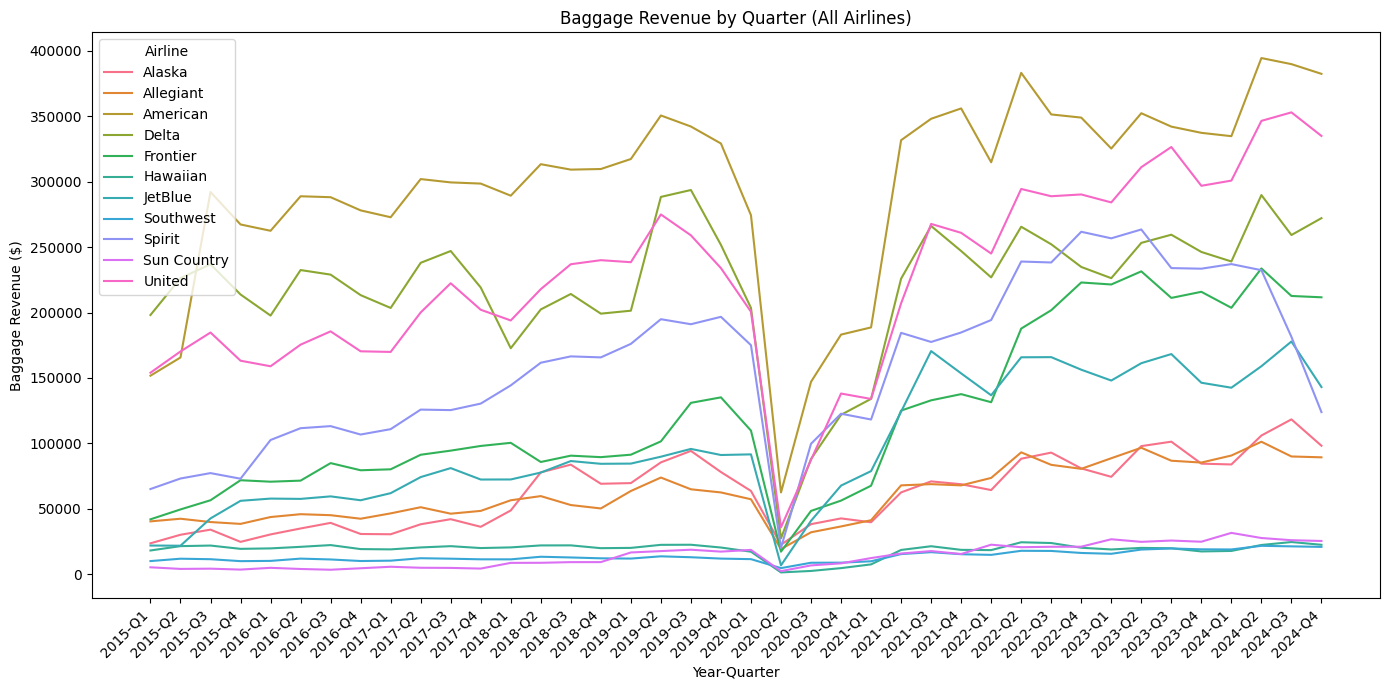